<img src='./pictures/ligue1.png'>

In [147]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [148]:
ligue1 = pd.read_csv("./datasets/ligue1.csv")
ligue1.loc[ligue1['Home Team Goals']>ligue1['Away Team Goals'], 'Winner'] = 0
ligue1.loc[ligue1['Home Team Goals']<ligue1['Away Team Goals'], 'Winner'] = 1
ligue1.loc[ligue1['Home Team Goals']==ligue1['Away Team Goals'], 'Winner'] = 2
ligue1.head()

,year,Home Team,Away Team,Home Team Goals,Away Team Goals,Winner
0,1999,Bordeaux,Bastia,3,2,0.0
1,1999,Monaco,St Etienne,2,2,2.0
2,1999,Auxerre,Nancy,2,1,0.0
3,1999,Lyon,Montpellier,1,2,1.0
4,1999,Marseille,Sedan,3,0,0.0


In [149]:
# home team wins
ligue1.loc[ligue1['Winner'] == 0 , 'Home Team Points'] = 3
ligue1.loc[ligue1['Winner'] == 0 , 'Away Team Points'] = 0

# away team wins
ligue1.loc[ligue1['Winner'] == 1 , 'Home Team Points'] = 0
ligue1.loc[ligue1['Winner'] == 1 , 'Away Team Points'] = 3

# tie
ligue1.loc[ligue1['Winner'] == 2 , 'Home Team Points'] = 1
ligue1.loc[ligue1['Winner'] == 2 , 'Away Team Points'] = 1


ligue1.head()

,year,Home Team,Away Team,Home Team Goals,Away Team Goals,Winner,Home Team Points,Away Team Points
0,1999,Bordeaux,Bastia,3,2,0.0,3.0,0.0
1,1999,Monaco,St Etienne,2,2,2.0,1.0,1.0
2,1999,Auxerre,Nancy,2,1,0.0,3.0,0.0
3,1999,Lyon,Montpellier,1,2,1.0,0.0,3.0
4,1999,Marseille,Sedan,3,0,0.0,3.0,0.0


In [150]:
final_points_home = ligue1.groupby(by=['year','Home Team']).agg({'Home Team Points':'sum'}).reset_index()
final_points_away = ligue1.groupby(by=['year','Away Team']).agg({'Away Team Points':'sum'}).reset_index()

final_points = final_points_home.merge(final_points_away, left_on=['year','Home Team'], right_on=['year','Away Team'])

final_points['points'] = final_points['Home Team Points'] + final_points['Away Team Points']
final_points = final_points[['year','Home Team', 'points']]
final_points.rename({'Home Team':'Team'})
final_points = final_points.sort_values(by =['year','points'], ascending=True)
final_points

,year,Home Team,points
9,1999,Montpellier,31.0
3,1999,Le Havre,34.0
6,1999,Marseille,42.0
10,1999,Nancy,42.0
11,1999,Nantes,43.0
...,...,...,...
382,2018,Marseille,61.0
391,2018,St Etienne,66.0
381,2018,Lyon,72.0
380,2018,Lille,75.0


In [151]:
final_status = pd.DataFrame()
for year in range(2002,2019):
    temp = final_points[final_points['year']==year].reset_index(drop=True)
    temp.loc[0:2,'pred'] =0
    temp.loc[17:19,'pred'] =2
    temp.loc[3:16 , 'pred']= 1 
    final_status = final_status.append(temp)
    
    
final_status.reset_index(drop=True)    

teams = final_status['Home Team'].unique()
teams.sort()

mapping = {team: index for index ,team in enumerate(teams) }
final_status = final_status.replace({'Home Team': mapping})
final_status.reset_index(drop=True)    



,year,Home Team,points,pred
0,2002,38,31.0,0.0
1,2002,33,36.0,0.0
2,2002,16,38.0,0.0
3,2002,0,39.0,1.0
4,2002,25,40.0,1.0
...,...,...,...,...
335,2018,22,61.0,1.0
336,2018,35,66.0,1.0
337,2018,21,72.0,2.0
338,2018,19,75.0,2.0


# What's happen if we shuffle the data?

# Prediction of each team in 2018\2019 season. 
In which part of the table each team will finish ?

Will she go to champions league? will she go to "Ligue 2"?

In [152]:
final_status=final_status.sample(frac=1).reset_index(drop=True)
final_status

,year,Home Team,points,pred
0,2010,35,49.0,1.0
1,2018,24,36.0,1.0
2,2002,7,64.0,1.0
3,2008,5,55.0,1.0
4,2017,19,38.0,1.0
...,...,...,...,...
335,2012,39,48.0,1.0
336,2008,37,64.0,1.0
337,2010,32,56.0,1.0
338,2006,19,50.0,1.0


In [153]:
X_train = final_status[final_status['year']<2018][['year','Home Team' ,'points']]
y_train = final_status[final_status['year']<2018][['pred']]
X_test = final_status[final_status['year']==2018][['year','Home Team' ,'points']]
y_test = final_status[final_status['year']==2018][['pred']]

In [154]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree Accuracy : ', dt.score(X_test,y_test),"\n")

y_pred = dt.predict(X_test)

print("Decision Tree Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy :  0.8 

Decision Tree Matrix:
[[ 3  0  0]
 [ 2 12  0]
 [ 0  2  1]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       0.86      0.86      0.86        14
         2.0       1.00      0.33      0.50         3

    accuracy                           0.80        20
   macro avg       0.82      0.73      0.70        20
weighted avg       0.84      0.80      0.79        20



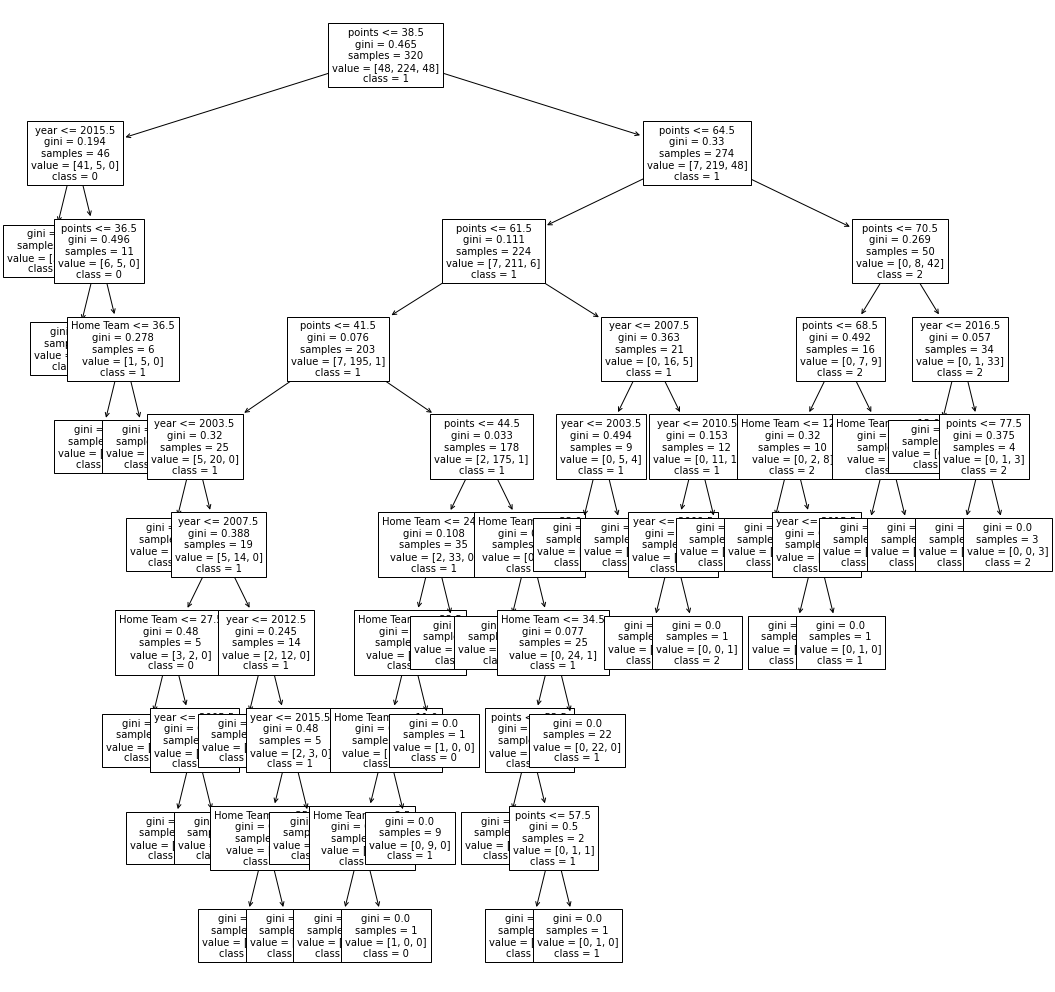

In [155]:
plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
plot_tree(dt, feature_names=X_train.columns, class_names = ['0','1', '2'], fontsize=10)
plt.show()

As we can see the Decision tree is more complex (due to the fact we have more year than the laliga) but the shuffle didn't effects the decision nodes queries. 

### Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(X_train,y_train)
print('Naive Bayes Accuracy : ', nb.score(X_test,y_test),"\n")

y_pred = nb.predict(X_test)

print("Naive Bayes Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy :  0.9 

Naive Bayes Matrix:
[[ 3  0  0]
 [ 2 12  0]
 [ 0  0  3]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.86      0.92        14
         2.0       1.00      1.00      1.00         3

    accuracy                           0.90        20
   macro avg       0.87      0.95      0.89        20
weighted avg       0.94      0.90      0.91        20



C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Supprisely the NB classifier gave us a more satisfying result than the DT classifier.

We can explain it by the fact that NB classifier assumes that the effect of a particular feature in a class is independent of other features, which is in our favor here, since there is no dependency between the Team and the other features.  

In contrary of DT which take in count the Team...

### Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train,y_train)

print('Logistic Regression Accuracy: ', lgr.score(X_test,y_test),"\n")

y_pred = lgr.predict(X_test)

print("Logistic Regression Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  0.85 

Logistic Regression Matrix:
[[ 3  0  0]
 [ 3 11  0]
 [ 0  0  3]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.79      0.88        14
         2.0       1.00      1.00      1.00         3

    accuracy                           0.85        20
   macro avg       0.83      0.93      0.85        20
weighted avg       0.93      0.85      0.87        20



C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Adaboost

In [158]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier()
adb.fit(X_train,y_train)
print('AdaBoost Accuracy : ', adb.score(X_test,y_test),"\n")

y_pred = adb.predict(X_test)

print("AdaBoost Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost Accuracy :  0.8 

AdaBoost Matrix:
[[ 3  0  0]
 [ 3 10  1]
 [ 0  0  3]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         3
         1.0       1.00      0.71      0.83        14
         2.0       0.75      1.00      0.86         3

    accuracy                           0.80        20
   macro avg       0.75      0.90      0.79        20
weighted avg       0.89      0.80      0.81        20



## Adaboost
using Decision Tree of depth 3

In [159]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3) ,n_estimators=50)
adaboost.fit(X_train,y_train)
print('AdaBoost Accuracy : ', adaboost.score(X_test,y_test),"\n")

y_pred = adaboost.predict(X_test)

print("AdaBoost Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost Accuracy :  0.95 

AdaBoost Matrix:
[[ 3  0  0]
 [ 1 13  0]
 [ 0  0  3]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.93      0.96        14
         2.0       1.00      1.00      1.00         3

    accuracy                           0.95        20
   macro avg       0.92      0.98      0.94        20
weighted avg       0.96      0.95      0.95        20



"טובים השניים מן האחד "

# How many Home victories will get PSG in 2018 ?

Is the "Parc des Princes" one of the strongest home stadium in Europe ? 

In [160]:
psg_table = ligue1[(ligue1['Home Team']=='Paris SG') & (ligue1['Winner']==0.0)]
psg = psg_table.groupby(by=['year']).agg({'Winner':'count'}).reset_index()
psg

,year,Winner
0,1999,11
1,2000,10
2,2001,8
3,2002,10
4,2003,13
5,2004,9
6,2005,11
7,2006,7
8,2007,4
9,2008,12


### Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = np.array(psg['year']), np.array(psg['Winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=19 , shuffle=False)

reg = LinearRegression()
reg.fit(X_train.reshape(-1, 1) ,y_train.reshape(-1, 1))
# print('Naive Bayes Accuracy : ', reg.score(X_test,y_test),"\n")

y_pred = np.round(reg.predict(X_test.reshape(1, -1)))
y_pred

array([[15.]])

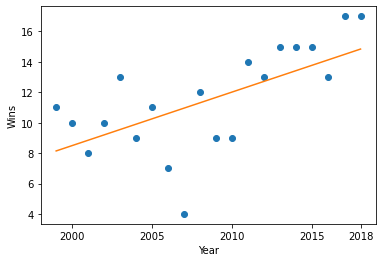

In [162]:
plt.plot(X, y, 'o')
plt.plot(X, reg.predict(X.reshape(-1, 1)))

plt.ylabel("Wins")
plt.xlabel("Year")

plt.xticks([2000, 2005, 2010, 2015, 2018])
plt.show()

The years before 2012 (before Qatar sponsers) PSG were a mean team, then the victories were low and it effects the line (pull it down). 